In [ ]:
%pip install tensorflow_decision_forests

# 1. Import libraries

https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
print('TensorFlow v' + tf.__version__)
print('Tensorflow Decision Forest v' + tfdf.__version__)

TensorFlow v2.15.0
Tensorflow Decision Forest v1.8.1


# 2. Load dataset

In [3]:
dataset_df = pd.read_csv('~/aiffel/data/house_price_train.csv')

In [4]:
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset_df.shape
dataset_df.info()
dataset_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Check the dataset size
dataset_df.shape

(1460, 81)

In [7]:
# Drop Id column which is not used as a feature
dataset_df = dataset_df.drop(['Id'], axis = 1)

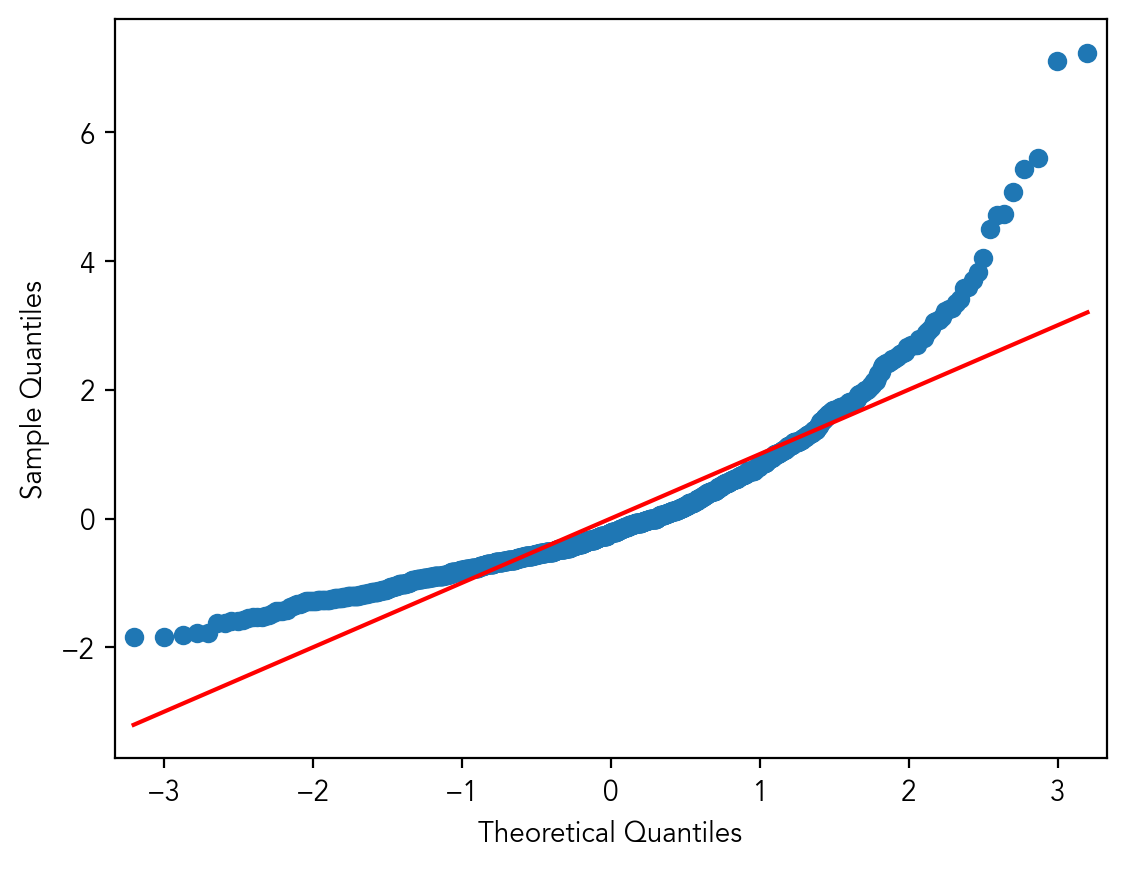

In [10]:
sm.qqplot(dataset_df['SalePrice'], fit=True, line='s');

## 3. House price disbribution

/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_34685/251860754.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color = 'red', ax = ax[0], bins = 100)


Text(0.5, 1.0, 'SalePrice Boxplot')

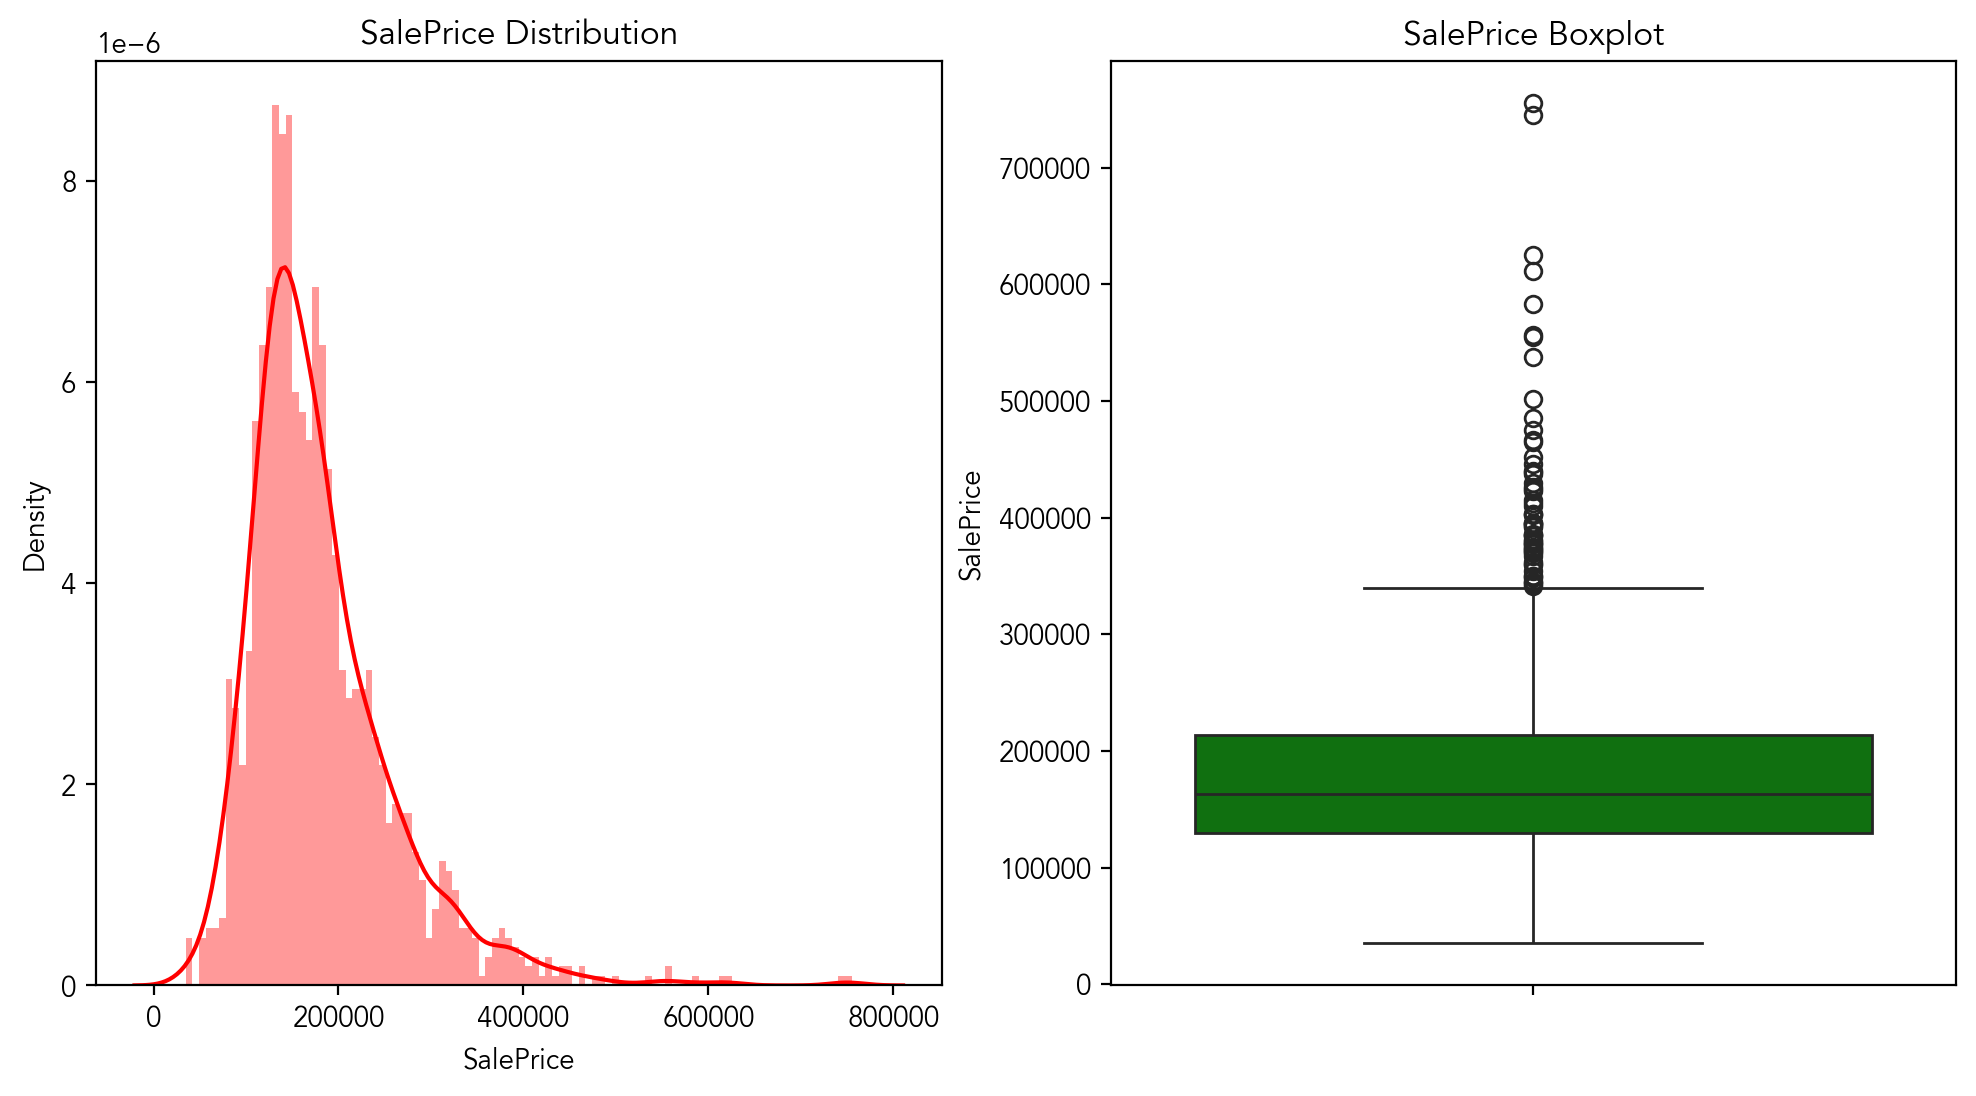

In [27]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(dataset_df['SalePrice'], color = 'red', ax = ax[0], bins = 100)
ax[0].set_title('SalePrice Distribution')
sns.boxplot(dataset_df['SalePrice'], color = 'green', ax = ax[1])
ax[1].set_title('SalePrice Boxplot')

In [20]:
dataset_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Numerical data distribution

In [30]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [32]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


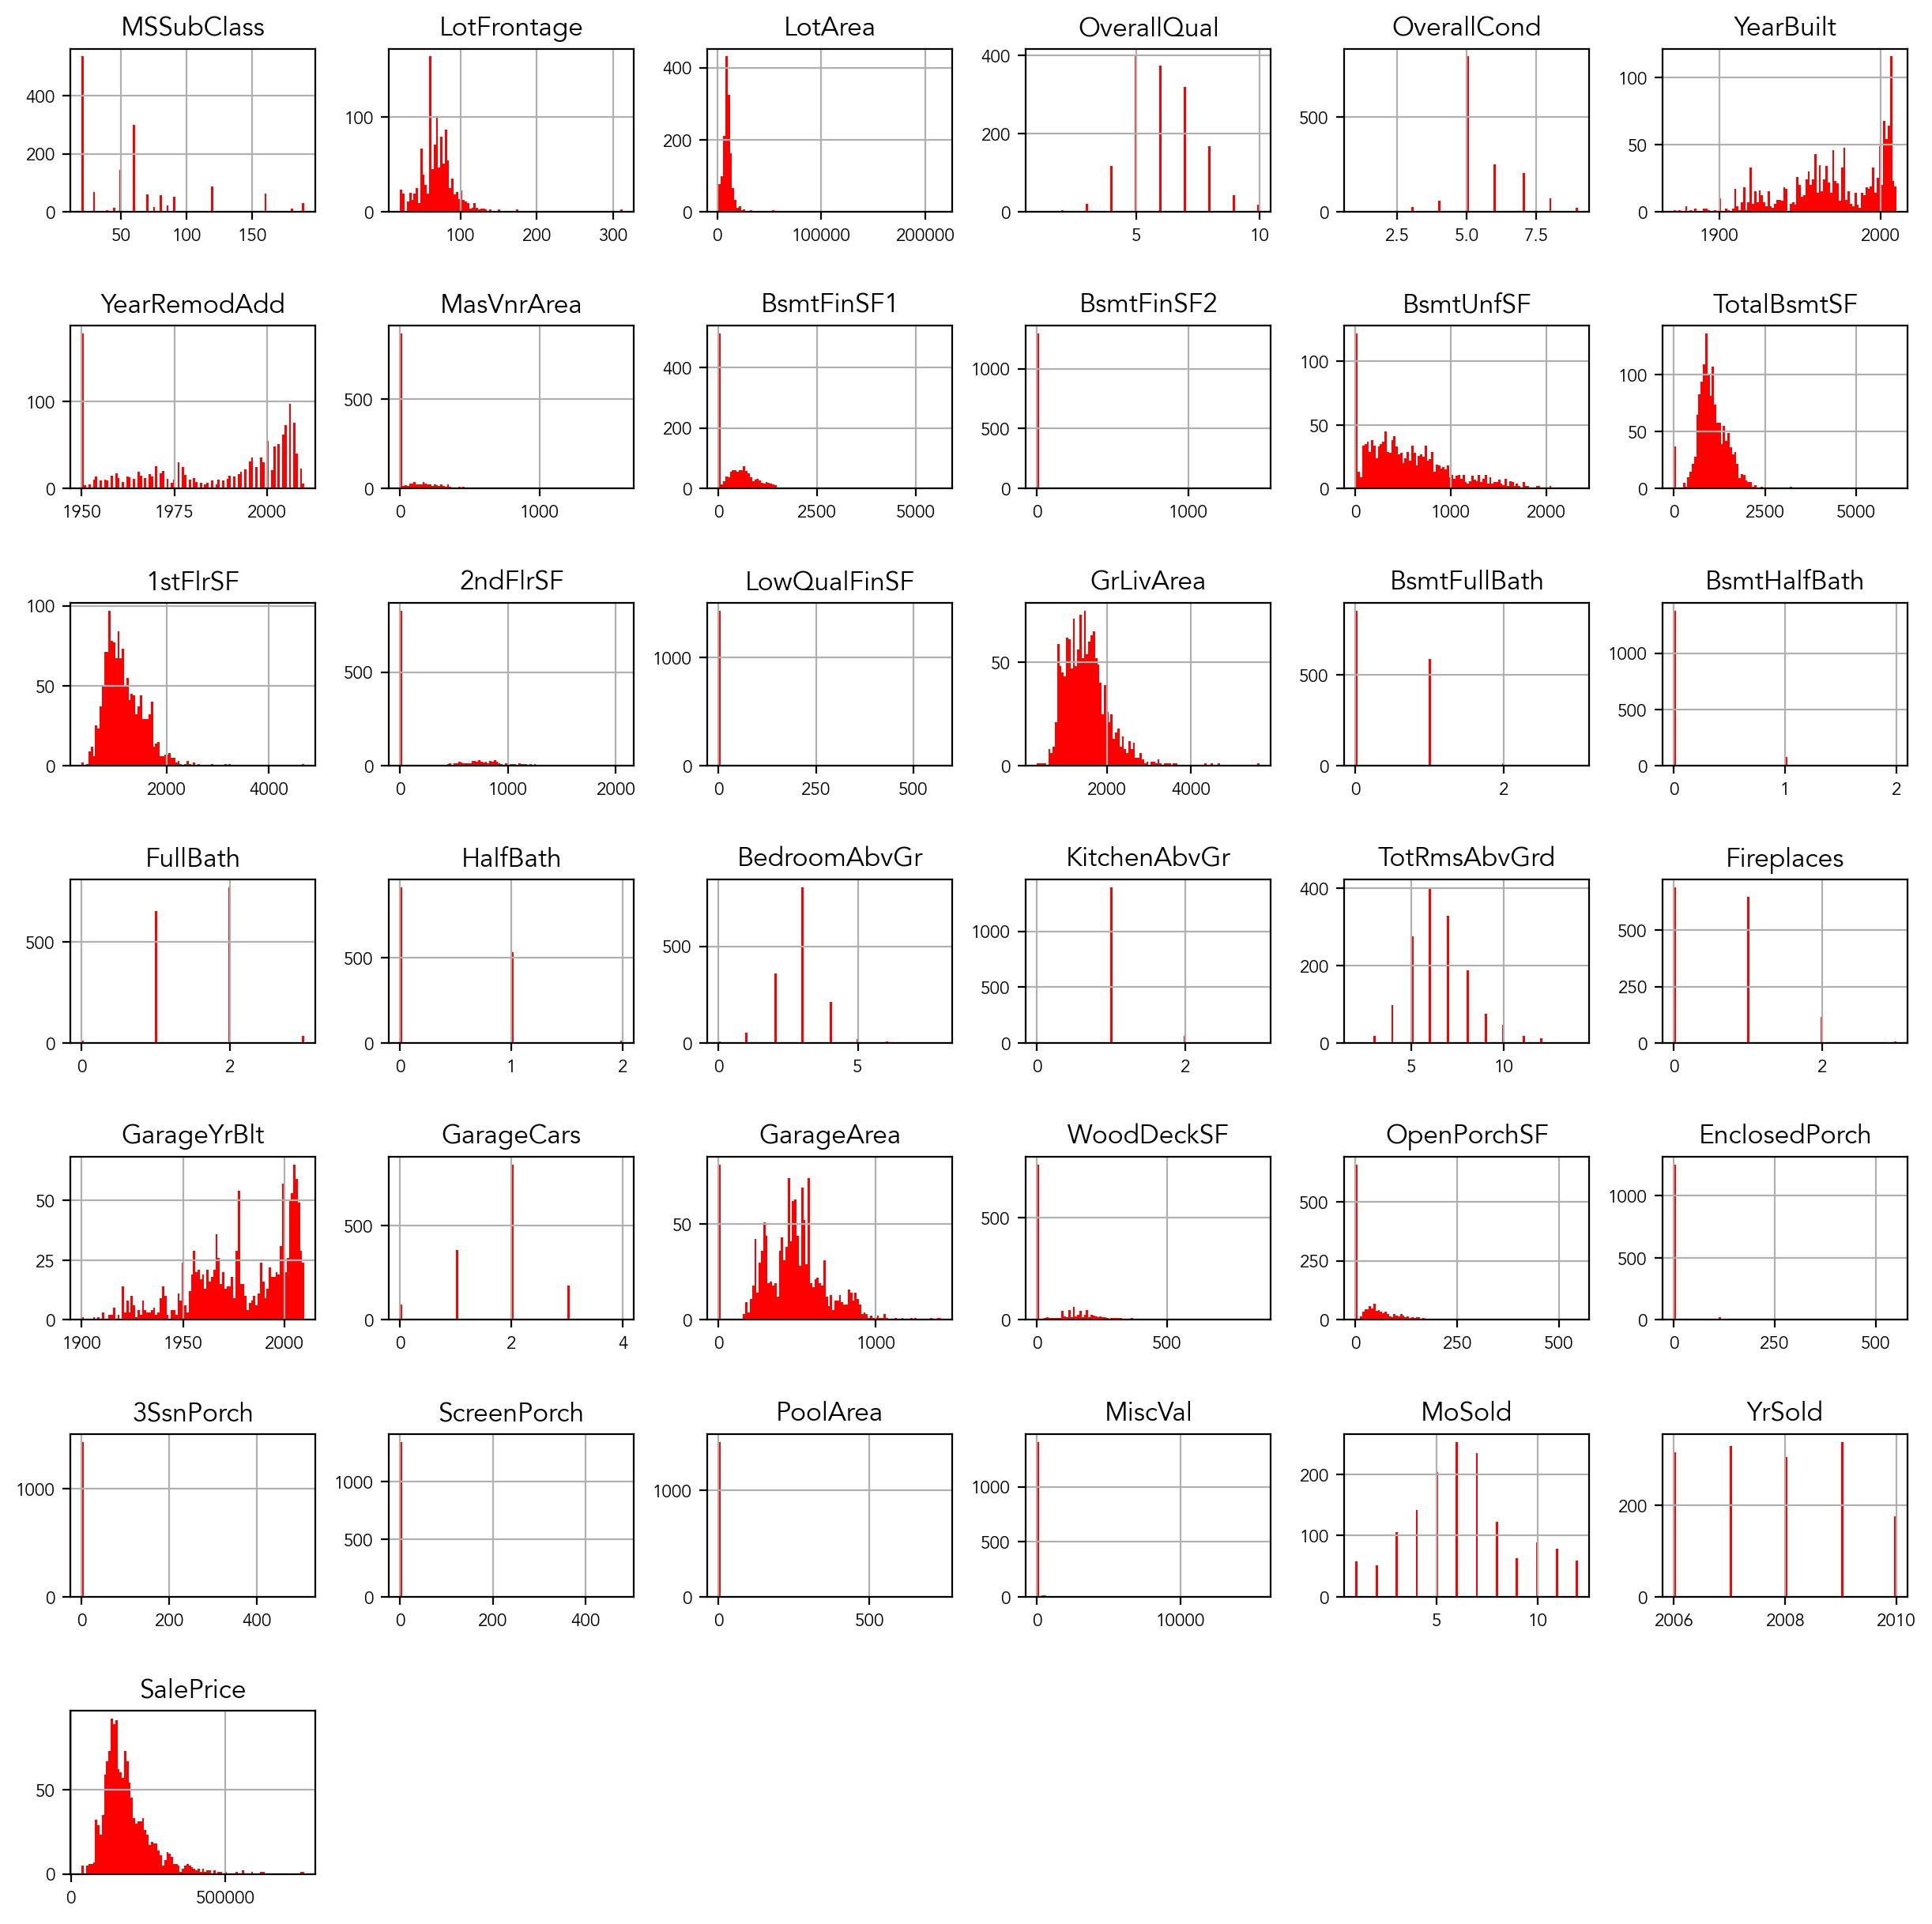

In [39]:
df_num.hist(figsize = (15, 15), color = 'r', bins = 100, xlabelsize = 8, ylabelsize =8)
plt.subplots_adjust(hspace = 0.7)

## Prepare the dataset

In [41]:
import numpy as n_splits

def split_dataset(dataset, test_ratio = 0.30):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print('{} examples in training, {} examples in testing.'.format(
    len(train_ds_pd), len(valid_ds_pd)
))


997 examples in training, 463 examples in testing.


## Convert dataset from pd.DataFrame to tf.data.Dataset

In [43]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label = label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label = label, task = tfdf.keras.Task.REGRESSION)

## Select a Model

In [44]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Configure model

In [47]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template = 'benchmark_rank1', task = tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/tmp88ey0115 as temporary training directory


## Create a Random Forest

In [49]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics = ['mse']) # Optional, you can use this to include a list of eval metrics

Use /var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/tmpmmpfcpjn as temporary training directory


## Train the model

In [50]:
rf.fit(x = train_ds)

Reading training dataset...
Training dataset read in 0:00:02.341202. Found 997 examples.
Training model...
Model trained in 0:00:00.453526
Compiling model...


[INFO 24-01-28 07:33:30.1463 KST kernel.cc:1233] Loading model from path /var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/tmpmmpfcpjn/model/ with prefix 0db8d820dd084d1a
[INFO 24-01-28 07:33:30.2659 KST decision_forest.cc:660] Model loaded with 300 root(s), 94688 node(s), and 76 input feature(s).
[INFO 24-01-28 07:33:30.2660 KST abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-01-28 07:33:30.2660 KST kernel.cc:1061] Use fast generic engine


Model compiled.


## Visualize the model

In [51]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx = 0, max_depth =3)

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

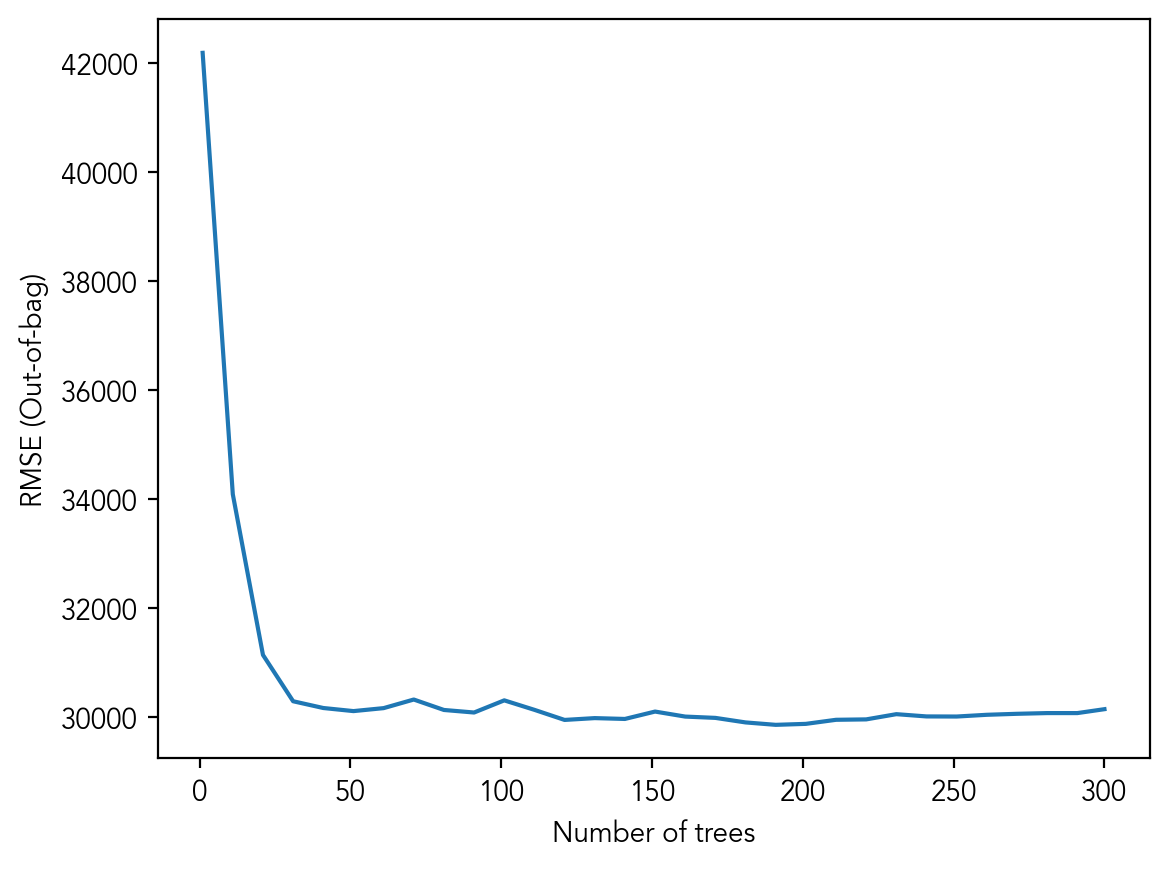

In [52]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel('Number of trees')
plt.ylabel('RMSE (Out-of-bag)')
plt.show()


In [53]:
# General stats on the OOB dataset.
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=997, accuracy=None, loss=None, rmse=30142.788035530488, ndcg=None, aucs=None, auuc=None, qini=None)

In [54]:
# Evaluate mode with validation dataset.
evaluation = rf.evaluate(x = valid_ds, return_dict = True)

for name, value in evaluation.items():
    print(f'{name}: {value:.4f}')

1/1 [==============================] - 0s 259ms/step - loss: 0.0000e+00 - mse: 790002624.0000
loss: 0.0000
mse: 790002624.0000


## Variable importance

In [56]:
print(f'Available variable importances:')
for importance in inspector.variable_importances().keys():
    print('\t', importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [57]:
inspector.variable_importances()['NUM_AS_ROOT']

[("OverallQual" (1; #62), 111.0),
 ("ExterQual" (4; #22), 51.0),
 ("GarageCars" (1; #32), 46.0),
 ("Neighborhood" (4; #59), 37.0),
 ("GrLivArea" (1; #38), 20.0),
 ("KitchenQual" (4; #44), 9.0),
 ("YearBuilt" (1; #76), 9.0),
 ("TotalBsmtSF" (1; #73), 6.0),
 ("BsmtQual" (4; #14), 4.0),
 ("GarageArea" (1; #31), 4.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("GarageYrBlt" (1; #37), 1.0)]

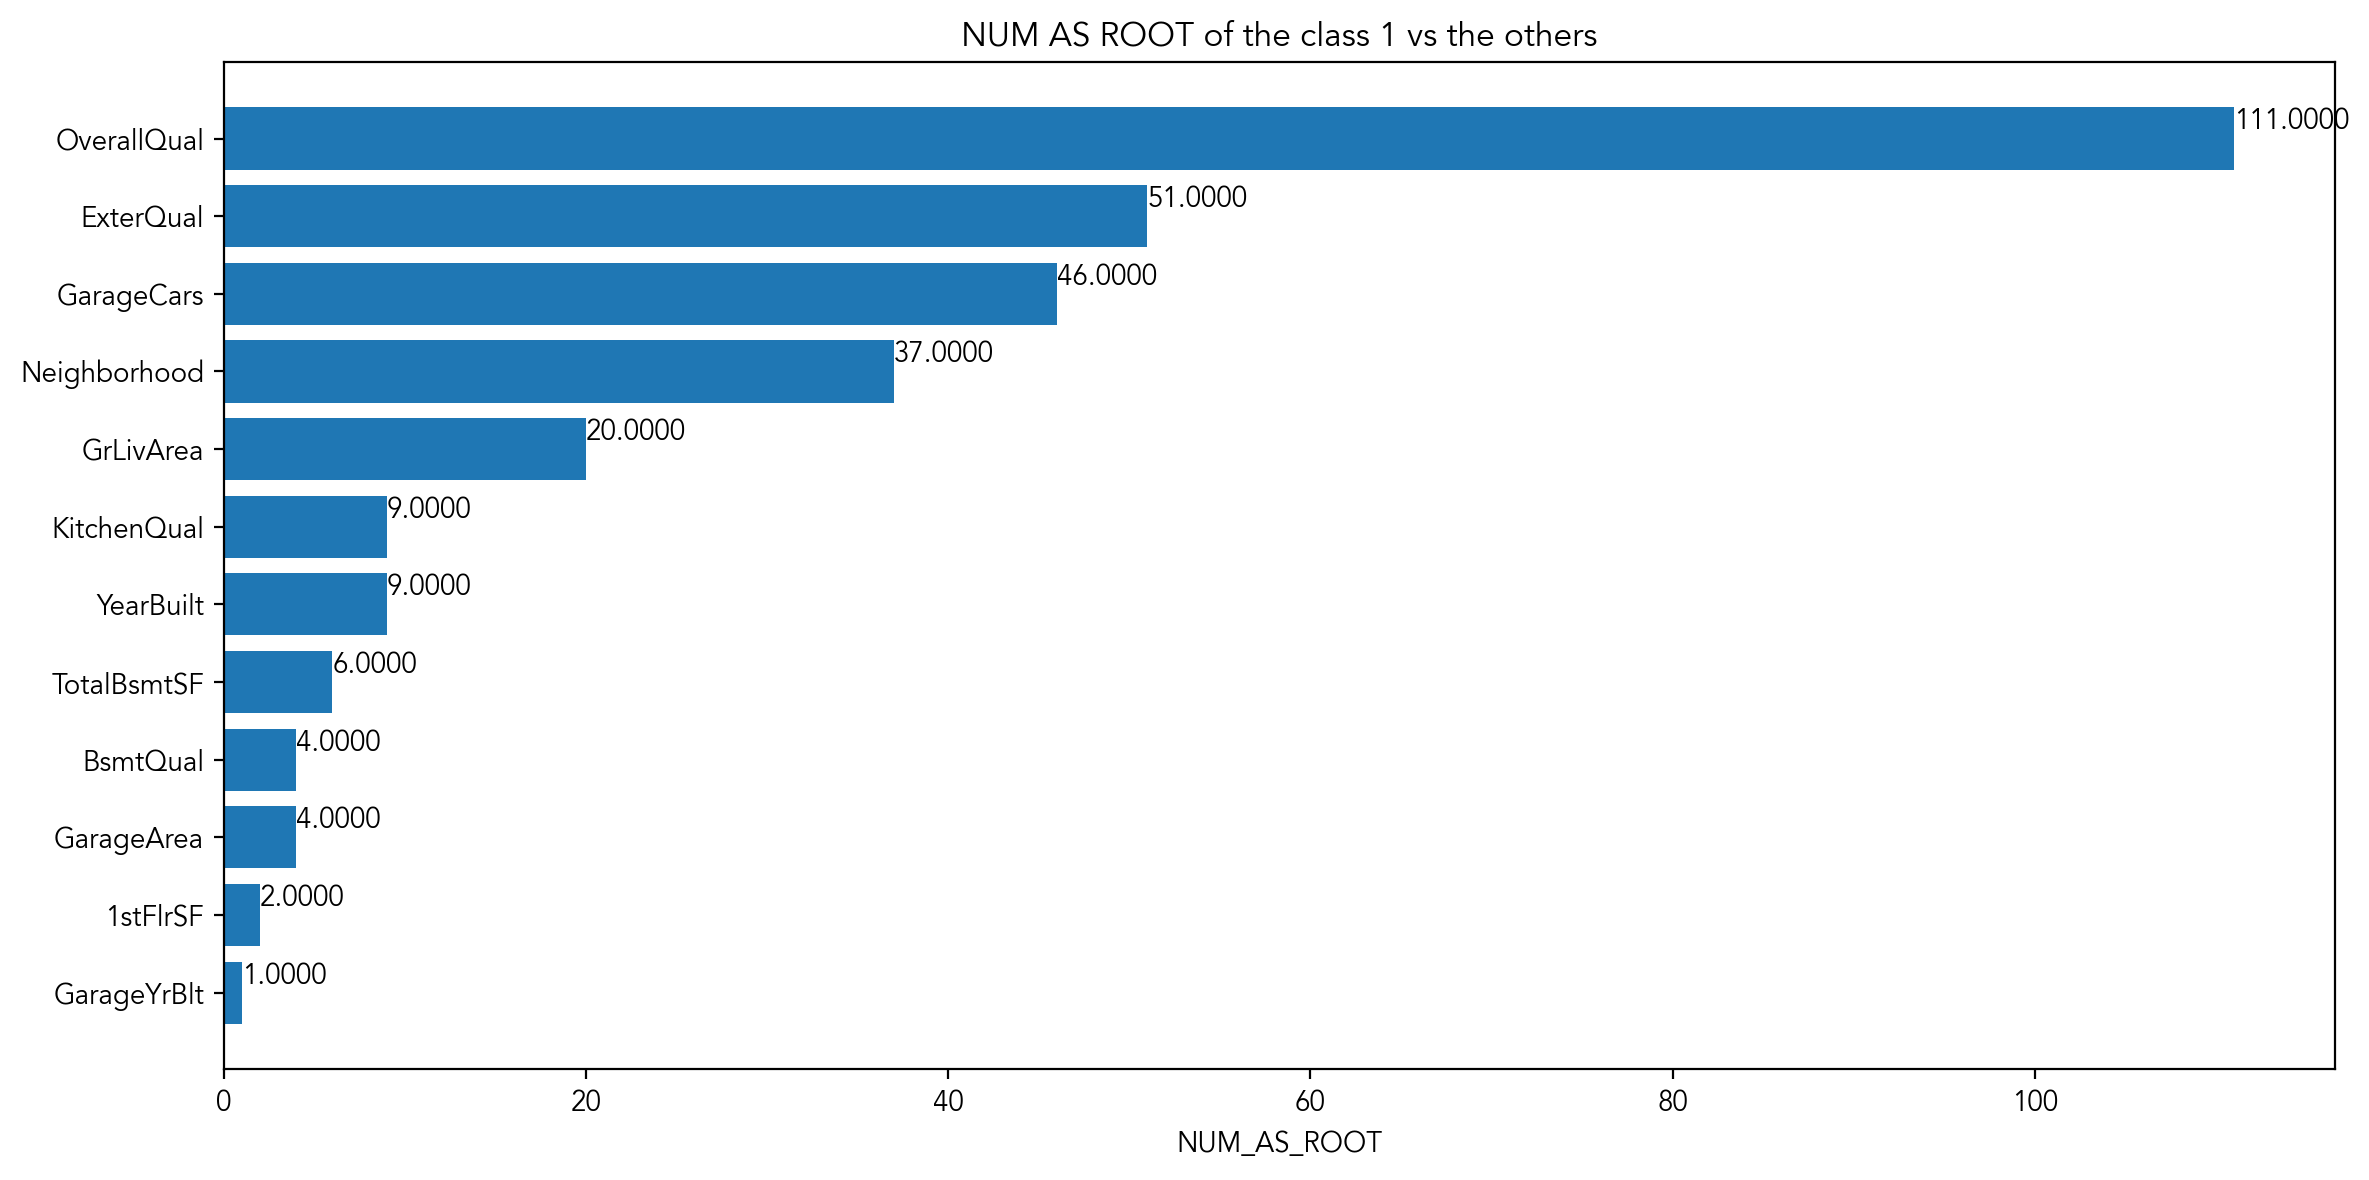

In [66]:
# Plot the vaiable importances from the inspector using Matplotlib

plt.figure(figsize = (12, 6))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = 'NUM_AS_ROOT'
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
# variable_importances is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label = [str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# todo: Replace with 'plt.bar_label()' when available.
# Label each bar with value.
for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f'{importance:.4f}', va='top')


plt.xlabel(variable_importance_metric)
plt.title('NUM AS ROOT of the class 1 vs the others')
plt.tight_layout()
plt.show()

## Submission

In [68]:
test_file_path = '~/aiffel/data/house_price_test.csv'
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids, 'SalesPrice': preds.squeeze()})

output.head()

2/2 [==============================] - 0s 12ms/step


,Id,SalesPrice
0,1461,127586.500000
1,1462,156364.734375
2,1463,178156.750000
3,1464,182341.718750
4,1465,196170.046875


In [70]:
sample_submission_df = pd.read_csv('~/aiffel/data/house_price_sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('~/aiffel/data/house_price_submission.csv', index = False)
sample_submission_df.head()

2/2 [==============================] - 0s 12ms/step


,Id,SalePrice
0,1461,127586.500000
1,1462,156364.734375
2,1463,178156.750000
3,1464,182341.718750
4,1465,196170.046875
